<a href="https://colab.research.google.com/github/Tungthanhlee/Iris-flowers-classification/blob/master/Iris_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
import numpy as np 
import seaborn as sns
from sklearn import metrics
from sklearn import datasets,svm
from sklearn.decomposition import PCA

In [0]:
%matplotlib inline
iris = datasets.load_iris()

In [0]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    iris.data, iris.target, test_size=0.20, random_state=42)

In [4]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)



(120, 4)
(120,)
(30, 4)
(30,)


In [0]:
def draw_confusion_matrix_with_seaborn(test_label, predictions, score):
    cm = metrics.confusion_matrix(test_lbl, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
    plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', multi_class='multinomial')


In [7]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
logisticRegr.predict(test_img[0:10])

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [9]:
softmax_predictions = logisticRegr.predict(test_img)
softmax_score = logisticRegr.score(test_img, test_lbl)
print(softmax_score)

1.0


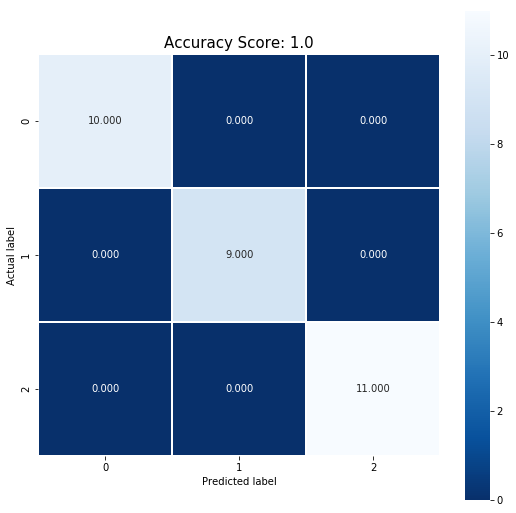

In [10]:
draw_confusion_matrix_with_seaborn(test_lbl, softmax_predictions, softmax_score)

In [0]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state = 0, tol = 1e-5)



In [12]:
clf.fit(train_img, train_lbl)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [13]:
linearSVM_prediction = clf.predict(test_img)
linearSVM_score = clf.score(test_img, test_lbl)
print(linearSVM_score)

1.0


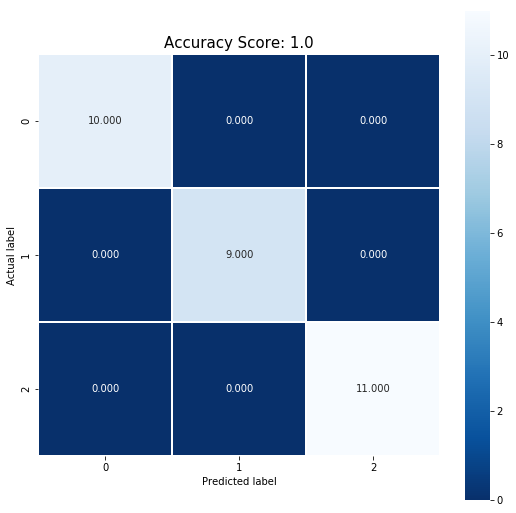

In [14]:
draw_confusion_matrix_with_seaborn(test_lbl, linearSVM_prediction, linearSVM_score)

In [0]:
from sklearn.svm import SVC
svm_poly_kernel = SVC(C=200,kernel='poly',gamma=0.01,cache_size=8000,probability=False)

In [16]:
svm_poly_kernel.fit(train_img, train_lbl)

SVC(C=200, cache_size=8000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svm_poly_kernel_prediction = svm_poly_kernel.predict(test_img)
svm_poly_kernel_score = svm_poly_kernel.score(test_img, test_lbl)
print(svm_poly_kernel_score)

1.0


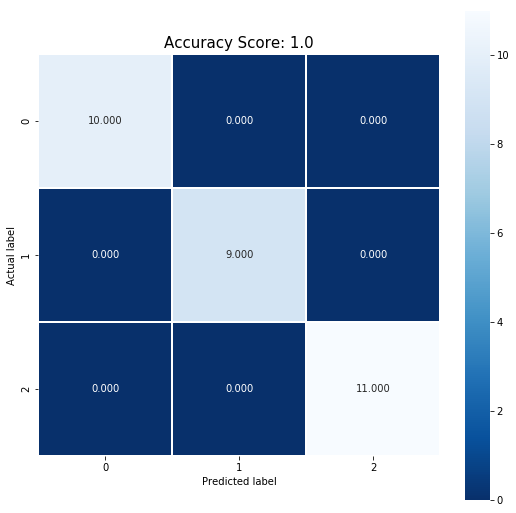

In [18]:
draw_confusion_matrix_with_seaborn(test_lbl, svm_poly_kernel_prediction, svm_poly_kernel_score)

In [0]:
svm_rbf_kernel = svm.SVC(kernel ='rbf', gamma = 1).fit(train_img, train_lbl)

In [29]:
svm_rbf_kernel_prediction = svm_rbf_kernel.predict(test_img)
svm_rbf_kernel_score = svm_rbf_kernel.score(test_img, test_lbl)
print(svm_rbf_kernel_score)

1.0


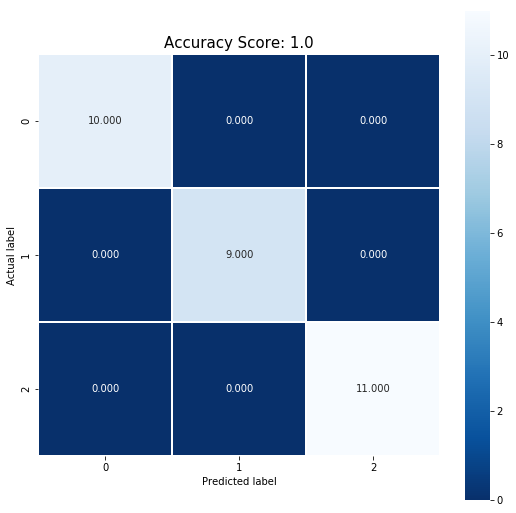

In [30]:
draw_confusion_matrix_with_seaborn(test_lbl, svm_rbf_kernel_prediction, svm_rbf_kernel_score)